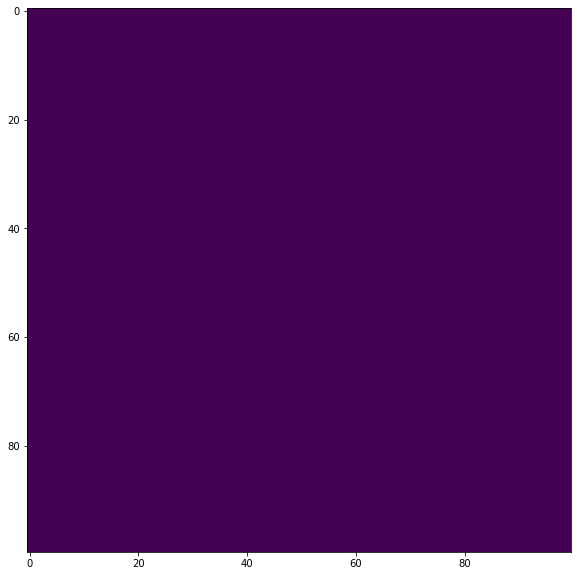

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, fsize=(10, 10)):
    figure = plt.figure(figsize=fsize)
    plt.imshow(img)
    plt.show()
show(np.zeros((100, 100)))

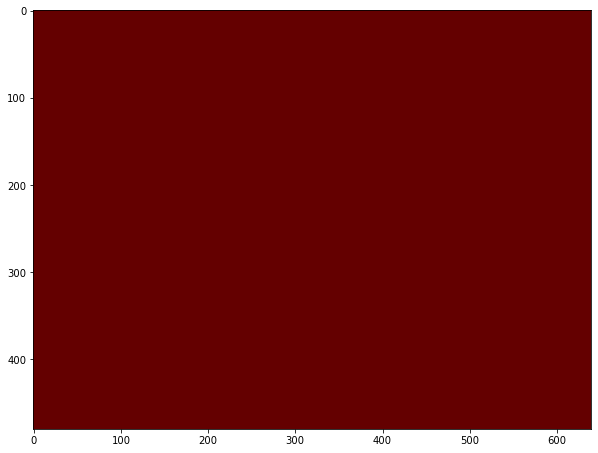

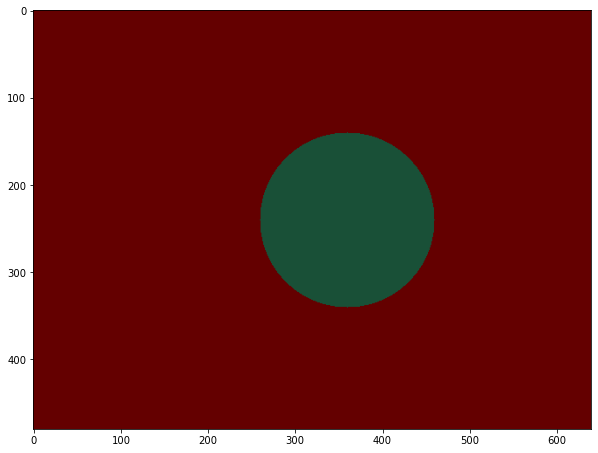

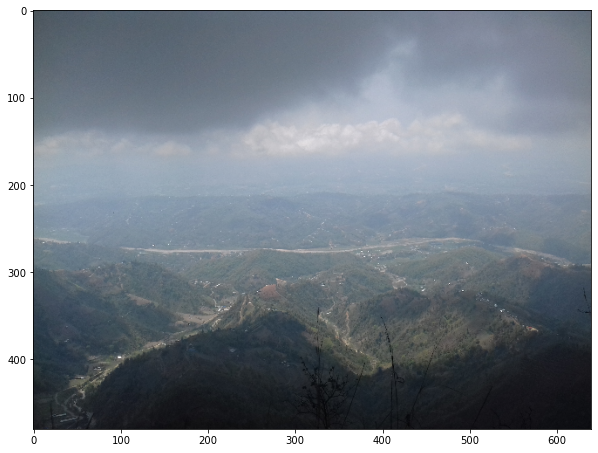

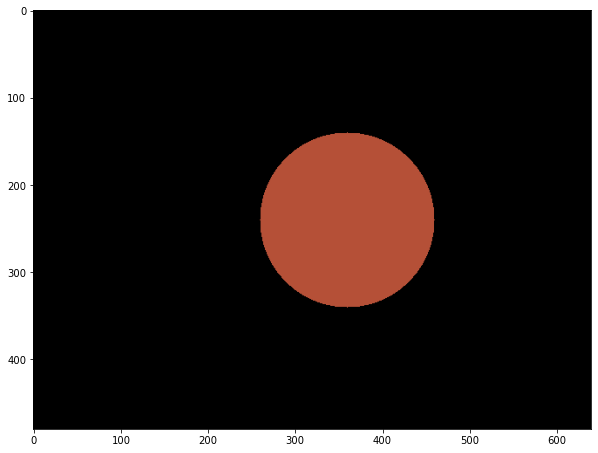

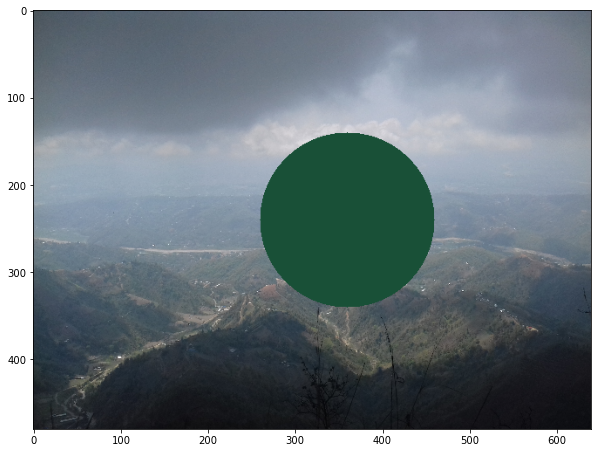

In [8]:
bg = np.zeros((480, 640, 3))
bg[:, :, 0] += 100
bg = bg.astype(np.uint8)
show(bg)

img = bg.copy()
cv2.circle(img, (360, 240), 100, (25, 80, 55), -1)
show(img)

scene = cv2.imread("scene.jpg", -1)
scene = cv2.resize(scene, (img.shape[1], img.shape[0]))
rgb_scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
show(rgb_scene)

mask = img-bg
show(mask)

res = rgb_scene.copy()
res[mask!=0] = img[mask!=0]
show(res)

In [9]:
def running_average(bg_img, image, aweight):
    if bg_img is None:
        bg_img=image.copy().astype("float")
    else:
        cv2.accumulateWeighted(image, bg_img, aweight)
    return bg_img

In [11]:
cam = cv2.VideoCapture(0)
notify_num = 200
frame_count=0

aweight = 0.5
bg = None
take_bg = True

scene = cv2.imread("scene.jpg")
scene = cv2.resize(scene, (640, 480))

while True:
    ret, frame = cam.read()
    frame = cv2.flip(frame, 1)
    clone = frame.copy()
    
    gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    
    key = cv2.waitKey(1) & 0xFF 
    
    if key == 27:
        break
    
    if take_bg == True and notify_num>frame_count:
        txt = f"Taking background, Hold Still: {str(notify_num-frame_count)}"
        
        cv2.putText(clone, txt, (10, 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        bg = running_average(bg, gray, aweight)
    else:
        take_bg=False
        frame_count = 0
        
        diff = cv2.absdiff(bg.astype("uint8"), gray)
        diff[diff<30] = 0 
        
        f = clone.copy()
        f[diff==0] = scene[diff==0]
        cv2.imshow("Subtraction", f)
    frame_count+=1
    cv2.imshow("Output", clone)
cam.release()
cv2.destroyAllWindows()
            
    